In [1]:
## This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_dt = pd.read_csv("/kaggle/input/titanic/train.csv")
test_dt = pd.read_csv("/kaggle/input/titanic/test.csv")

print("train data:",train_dt.shape,"\n","test dta:",test_dt.shape)

train data: (891, 12) 
 test dta: (418, 11)


In [4]:
full_dt = train_dt.append(test_dt)
print(full_dt.shape)
print(full_dt.describe())

(1309, 12)
       PassengerId    Survived       Pclass          Age        SibSp  \
count  1309.000000  891.000000  1309.000000  1046.000000  1309.000000   
mean    655.000000    0.383838     2.294882    29.881138     0.498854   
std     378.020061    0.486592     0.837836    14.413493     1.041658   
min       1.000000    0.000000     1.000000     0.170000     0.000000   
25%     328.000000    0.000000     2.000000    21.000000     0.000000   
50%     655.000000    0.000000     3.000000    28.000000     0.000000   
75%     982.000000    1.000000     3.000000    39.000000     1.000000   
max    1309.000000    1.000000     3.000000    80.000000     8.000000   

             Parch         Fare  
count  1309.000000  1308.000000  
mean      0.385027    33.295479  
std       0.865560    51.758668  
min       0.000000     0.000000  
25%       0.000000     7.895800  
50%       0.000000    14.454200  
75%       0.000000    31.275000  
max       9.000000   512.329200  


# **檢查特徵與生存率的關係**

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

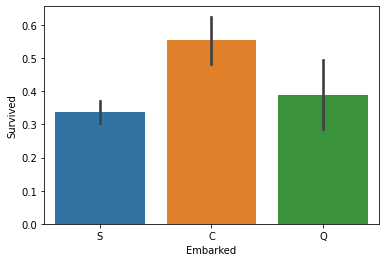

In [5]:
sns.barplot(data=train_dt,x = "Embarked",y = "Survived")

In [6]:
full_dt["Survived"][full_dt["Embarked"]=="S"].value_counts(normalize=True)
# 0 是死亡率 ; 1 是生存率

0.0    0.663043
1.0    0.336957
Name: Survived, dtype: float64

In [7]:
print('登船地為"S",其乘客生存率為%.2f'%full_dt["Survived"][full_dt["Embarked"]=="S"].value_counts(normalize=True)[1])
print('登船地為"C",其乘客生存率為%.2f'%full_dt["Survived"][full_dt["Embarked"]=="C"].value_counts(normalize=True)[1])
print('登船地為"Q",其乘客生存率為%.2f'%full_dt["Survived"][full_dt["Embarked"]=="Q"].value_counts(normalize=True)[1])

登船地為"S",其乘客生存率為0.34
登船地為"C",其乘客生存率為0.55
登船地為"Q",其乘客生存率為0.39


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

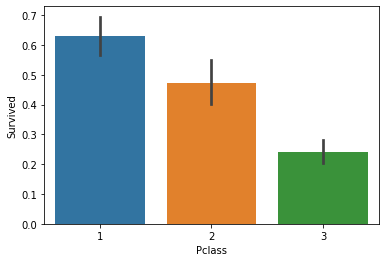

In [8]:
sns.barplot(data=train_dt,x = "Pclass",y = "Survived")

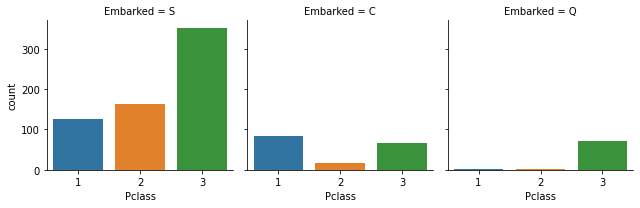

In [9]:
sns.catplot(x ="Pclass",col = "Embarked",data=train_dt,kind ="count",height =3)

In [10]:
full_dt["SibSp"].value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

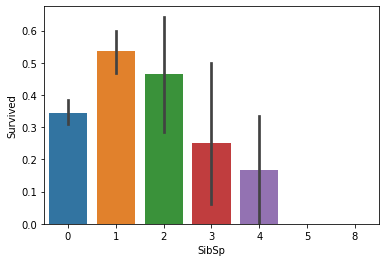

In [11]:
sns.barplot(data=train_dt,x = "SibSp",y = "Survived")

In [12]:
full_dt["Parch"].value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: Parch, dtype: int64

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

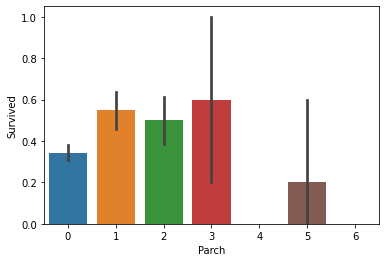

In [13]:
sns.barplot(data=train_dt,x = "Parch",y = "Survived")

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

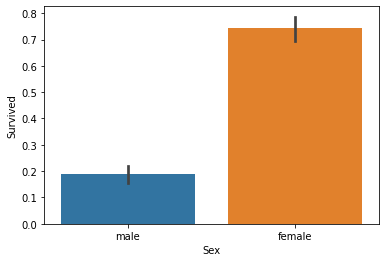

In [14]:
sns.barplot(data=train_dt,x = "Sex",y = "Survived")

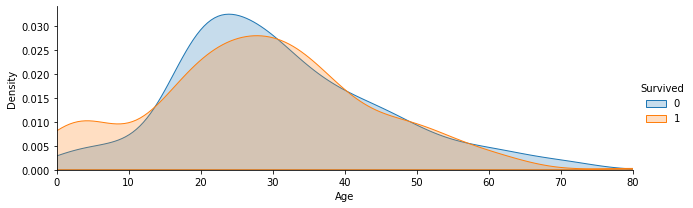

In [15]:
ageFacet = sns.FacetGrid(train_dt,hue = "Survived",aspect = 3)
ageFacet.map(sns.kdeplot,"Age",shade = True)
ageFacet.add_legend()
ageFacet.set(xlim=(0,train_dt["Age"].max())) #0以下移除，取到資料年齡最大值

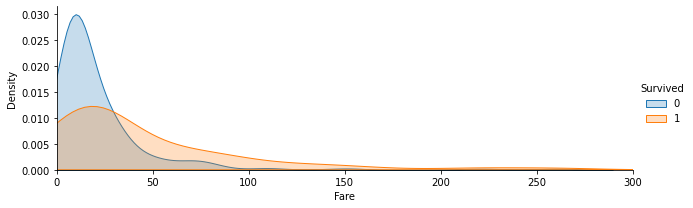

In [16]:
ageFacet = sns.FacetGrid(train_dt,hue = "Survived",aspect = 3)
ageFacet.map(sns.kdeplot,"Fare",shade = True)
ageFacet.add_legend()
ageFacet.set(xlim=(0,300)) #0以下移除，取到船票票價 = 300

# **檢查空值**

In [17]:
full_dt.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,True,False,False,False,True,False,False,False,False,True,False
414,False,True,False,False,False,False,False,False,False,False,False,False
415,False,True,False,False,False,False,False,False,False,False,True,False
416,False,True,False,False,False,True,False,False,False,False,True,False


### **1. Embarked** 
發現 S 的數量佔了絕大多數，因此將Embarked的空值皆填為 S

In [18]:
full_dt["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [19]:
full_dt[full_dt["Embarked"].isnull()].fillna("S")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


In [20]:
full_dt[full_dt["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [21]:
full_dt["Embarked"]=full_dt["Embarked"].fillna("S")

### **2. Fare**

In [22]:
full_dt[full_dt["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [23]:
a = round(full_dt[(full_dt["Pclass"]== 3) & (full_dt["Embarked"]== "S")]["Fare"].mean(),3)
full_dt["Fare"] = full_dt["Fare"].fillna(a)

In [24]:
a = round(full_dt[(full_dt["Pclass"]== 3) & (full_dt["Embarked"]== "S")]["Fare"].mean(),3)

### **3. Name**
**修改稱謂**

In [25]:
full_dt["Title"] = full_dt["Name"].map(lambda x:x.split(",")[1].split(".")[0].strip())
full_dt["Title"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [26]:
full_dt["Title"].value_counts().sum()

1309

In [27]:
TitleDict={}
TitleDict ['Mr']='Mr'
TitleDict ['MIle']='Miss'
TitleDict['Miss']='Miss'
TitleDict ['Master']= 'Master'
TitleDict['Jonkheer' ]='Master'
TitleDict ['Mme']='Mrs'
TitleDict ['Ms' ]='Mrs'
TitleDict['Mrs']='Mrs'
TitleDict ['Don']= 'Royalty'
TitleDict['Sir']='Royalty'
TitleDict['the Countess']='Royalty'
TitleDict['Dona']= 'Royalty'
TitleDict['Lady']= 'Royalty'
TitleDict ['Capt']= 'Officer'
TitleDict['Col']='Officer'
TitleDict ['Major']= 'Officer'
TitleDict['Dr']= 'Officer'
TitleDict ['Rev']= 'Officer'

full_dt['Title']=full_dt['Title'].map(TitleDict)
full_dt[ 'Title'].value_counts()

Mr         757
Miss       260
Mrs        200
Master      62
Officer     23
Royalty      5
Name: Title, dtype: int64

In [28]:
full_dt.iloc[641,12]  = "Miss"
full_dt.iloc[710,12] = "Mrs"

<AxesSubplot:xlabel='Title', ylabel='Survived'>

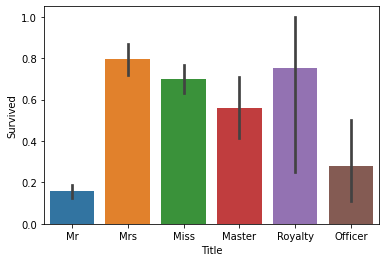

In [29]:
sns.barplot(data=full_dt,x = "Title",y = "Survived")

### **4. Parch & SibSp**
**合併家庭人口數**

In [30]:
full_dt["FamilyNum"] =full_dt["Parch"]+full_dt["SibSp"] + 1

<AxesSubplot:xlabel='FamilyNum', ylabel='Survived'>

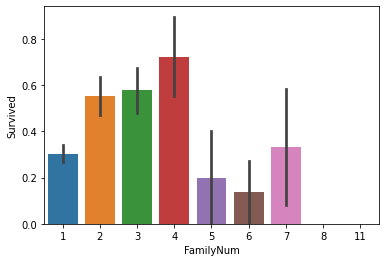

In [31]:
sns.barplot(data=full_dt,x = "FamilyNum",y = "Survived")

In [32]:
def familysize(familyNum):
    if familyNum ==1 :
        return 0
    elif 2<= familyNum <= 4:
        return 1
    else:
        return 2
full_dt["FamilySize"] = full_dt["FamilyNum"].map(familysize)
full_dt["FamilySize"].value_counts()

0    790
1    437
2     82
Name: FamilySize, dtype: int64

<AxesSubplot:xlabel='FamilySize', ylabel='Survived'>

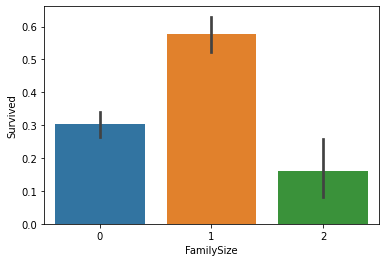

In [33]:
sns.barplot(data=full_dt,x = "FamilySize",y = "Survived")

### **5. Ticket**

In [34]:
full_dt["Ticket"].value_counts()

CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: Ticket, Length: 929, dtype: int64

In [35]:
TicketCountDict = {}
TicketCountDict = full_dt["Ticket"].value_counts()
TicketCountDict.head()

CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
Name: Ticket, dtype: int64

In [36]:
full_dt["TickCot"] = full_dt["Ticket"].map(TicketCountDict)
full_dt["TickCot"]

0      1
1      2
2      1
3      2
4      1
      ..
413    1
414    3
415    1
416    1
417    3
Name: TickCot, Length: 1309, dtype: int64

<AxesSubplot:xlabel='TickCot', ylabel='Survived'>

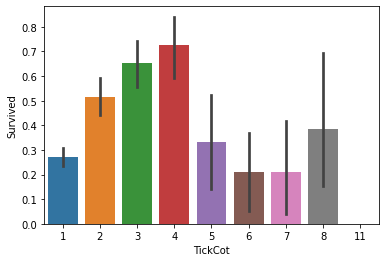

In [37]:
sns.barplot(data=full_dt,x = "TickCot",y = "Survived")

In [38]:
def TicketGroup(Ticket):
    if 2<= Ticket <= 4 :
        return 0
    elif (Ticket == 1) | (5 <= Ticket <=8):
        return 1
    else:
        return 2
full_dt["TicketGp"] = full_dt["TickCot"].map(TicketGroup)
full_dt["TicketGp"].value_counts()

1    823
0    475
2     11
Name: TicketGp, dtype: int64

<AxesSubplot:xlabel='TicketGp', ylabel='Survived'>

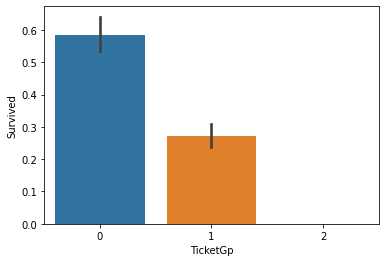

In [39]:
sns.barplot(data=full_dt,x = "TicketGp",y = "Survived")

In [40]:
full_dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilyNum,FamilySize,TickCot,TicketGp
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,1,1,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,2,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,2,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,0,1,1


In [41]:
full_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
 12  Title        1309 non-null   object 
 13  FamilyNum    1309 non-null   int64  
 14  FamilySize   1309 non-null   int64  
 15  TickCot      1309 non-null   int64  
 16  TicketGp     1309 non-null   int64  
dtypes: float64(3), int64(8), object(6)
memory usage: 216.4+ KB


### **填補 Age 空值**

In [42]:
full_dt[full_dt["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilyNum,FamilySize,TickCot,TicketGp
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,1,0,1,1
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Mr,1,0,1,1
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Mrs,1,0,1,1
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Mr,1,0,1,1
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Miss,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q,Miss,1,0,1,1
410,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q,Miss,1,0,1,1
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr,1,0,1,1
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr,1,0,1,1


In [43]:
full_dt["Title"].value_counts()

Mr         757
Miss       261
Mrs        201
Master      62
Officer     23
Royalty      5
Name: Title, dtype: int64

In [44]:
ID = ["Mr", "Miss", "Mrs", "Master", "Officer", "Royalty"]
for title in ID:
    for i,name in enumerate (full_dt[full_dt["Age"].isnull()] ["Title"]):
        if title in name:
            mask =  (full_dt["Age"].isnull()) & ( (full_dt["Title"].str.contains(title)))
            age_median = full_dt[(full_dt["Title"].str.contains(title))]["Age"].median()
            full_dt.loc[mask,"Age"] = full_dt.loc[mask,"Age"].fillna(age_median)
full_dt[full_dt["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilyNum,FamilySize,TickCot,TicketGp


In [45]:
full_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
 12  Title        1309 non-null   object 
 13  FamilyNum    1309 non-null   int64  
 14  FamilySize   1309 non-null   int64  
 15  TickCot      1309 non-null   int64  
 16  TicketGp     1309 non-null   int64  
dtypes: float64(3), int64(8), object(6)
memory usage: 216.4+ KB


### **處理 剩餘文字**

In [46]:
full_dt["Sex"] = full_dt["Sex"].replace({"male":1,"female":0})

In [47]:
full_dt["Title"] = full_dt["Title"].replace({"Mr": 0 ,"Miss":1, "Mrs":2, "Master":3, "Officer":4, "Royalty":5})

In [48]:
full_dt["Embarked"] = full_dt["Embarked"].replace({"C":0,"Q":1,"S":2})

In [49]:
full_dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilyNum,FamilySize,TickCot,TicketGp
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,0,2,1,1,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,2,2,1,2,0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,1,1,0,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,2,2,1,2,0
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,0,1,0,1,1


### **移除不需要的欄位**

In [50]:
full_dt_v2 = full_dt
full_dt_v2 = full_dt_v2.drop(columns=["Cabin","PassengerId","Ticket","FamilyNum","TickCot","Name"], axis = 1)                                   
full_dt_v2.head()                                 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,TicketGp
0,0.0,3,1,22.0,1,0,7.2500,2,0,1,1
1,1.0,1,0,38.0,1,0,71.2833,0,2,1,0
2,1.0,3,0,26.0,0,0,7.9250,2,1,0,1
3,1.0,1,0,35.0,1,0,53.1000,2,2,1,0
4,0.0,3,1,35.0,0,0,8.0500,2,0,0,1


In [51]:
full_dt_v2.info()   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      1309 non-null   int64  
 2   Sex         1309 non-null   int64  
 3   Age         1309 non-null   float64
 4   SibSp       1309 non-null   int64  
 5   Parch       1309 non-null   int64  
 6   Fare        1309 non-null   float64
 7   Embarked    1309 non-null   int64  
 8   Title       1309 non-null   int64  
 9   FamilySize  1309 non-null   int64  
 10  TicketGp    1309 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 155.0 KB


### **拆分模型資料**

In [52]:
full_dt.shape

(1309, 17)

In [53]:
df_train = full_dt_v2.iloc[:891,:]
df_test = full_dt_v2.iloc[891:,:]
df_test.shape

(418, 11)

In [54]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,TicketGp
0,0.0,3,1,22.0,1,0,7.2500,2,0,1,1
1,1.0,1,0,38.0,1,0,71.2833,0,2,1,0
2,1.0,3,0,26.0,0,0,7.9250,2,1,0,1
3,1.0,1,0,35.0,1,0,53.1000,2,2,1,0
4,0.0,3,1,35.0,0,0,8.0500,2,0,0,1


In [55]:
df_train_X = df_train.drop(columns = ["Survived"],axis = 1)
df_train_y = df_train["Survived"]
df_train_X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,TicketGp
0,3,1,22.0,1,0,7.2500,2,0,1,1
1,1,0,38.0,1,0,71.2833,0,2,1,0
2,3,0,26.0,0,0,7.9250,2,1,0,1
3,1,0,35.0,1,0,53.1000,2,2,1,0
4,3,1,35.0,0,0,8.0500,2,0,0,1


In [56]:
df_test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,TicketGp
0,NaN,3,1,34.5,0,0,7.8292,1,0,0,1
1,NaN,3,0,47.0,1,0,7.0000,2,2,1,1
2,NaN,2,1,62.0,0,0,9.6875,1,0,0,1
3,NaN,3,1,27.0,0,0,8.6625,2,0,0,1
4,NaN,3,0,22.0,1,1,12.2875,2,2,1,0


In [57]:
df_test_X = df_test.drop(columns = ["Survived"],axis = 1)
df_test_X.shape

(418, 10)

### **拆分資料集**

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train_X, df_train_y ,test_size=0.25, random_state=1)

In [59]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold

kfold=StratifiedKFold(n_splits=10)

classifiers=[ ]
classifiers.append(SVC())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(ExtraTreesClassifier())
classifiers.append(GradientBoostingClassifier())
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression())
classifiers.append(LinearDiscriminantAnalysis())

In [60]:
cv_results=[]
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier,X_train,y_train,
                                 scoring='accuracy', cv=kfold,n_jobs=-1))

In [61]:
cv_means=[]
cv_std=[]
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cvResDf=pd.DataFrame({'cv_mean': cv_means,
                          'cv_std' : cv_std,
                          'algorithm':['SVC','DecisionTreeCla','RandomForestCla','ExtraTreesCla',
                                        'GradientBoostingCla', 'KNN' , 'LR' , 'LinearDiscrimiAna']})
cvResDf

,cv_mean,cv_std,algorithm
0,0.681185,0.040303,SVC
1,0.790479,0.034983,DecisionTreeCla
2,0.829444,0.049359,RandomForestCla
3,0.810018,0.050488,ExtraTreesCla
4,0.833921,0.042827,GradientBoostingCla
5,0.699299,0.060200,KNN
6,0.821755,0.043961,LR
7,0.823315,0.048724,LinearDiscrimiAna


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


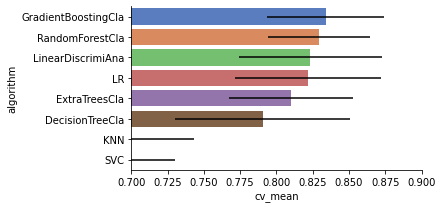

In [62]:
#Model Selection
cvResFacet=sns. FacetGrid(cvResDf . sort_values(by='cv_mean', ascending=False),sharex=False,
                          sharey=False, aspect=2)
cvResFacet.map(sns.barplot, 'cv_mean', 'algorithm' ,**{'xerr' :cv_std},
               palette='muted')
cvResFacet.set(xlim=(0.7,0.9))
cvResFacet.add_legend()

In [63]:
GBC = GradientBoostingClassifier()
gb_param_grid = {"loss":["deviance"],
                 "n_estimators": [100,200,300],
                 "learning_rate" : [0.1, 0.05, 0.01],
                  "max_depth" : [4, 8],
                  "min_samples_leaf" : [180, 150],
                 "max_features": [0.3, 0.1]
                }
modelgsGBC = GridSearchCV(GBC, param_grid = gb_param_grid, cv=kfold,
scoring="accuracy", n_jobs= -1, verbose = 1)
modelgsGBC.fit(X_train,y_train)

print(modelgsGBC.best_params_)

Fitting 10 folds for each of 72 candidates, totalling 720 fits
{'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 8, 'max_features': 0.3, 'min_samples_leaf': 150, 'n_estimators': 300}


In [64]:
y_pred=modelgsGBC.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print(cm)
print("--------------------------------------")
print(acc)
print("--------------------------------------")
print(cr)

[[115  13]
 [ 27  68]]
--------------------------------------
0.820627802690583
--------------------------------------
              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85       128
         1.0       0.84      0.72      0.77        95

    accuracy                           0.82       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.82      0.82      0.82       223



In [65]:
y_ans2 = modelgsGBC.predict(df_test_X)
y_ans2 = y_ans2.astype(int)
y_ans2

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [66]:
df_test_X.shape

(418, 10)

In [67]:
full_dt.iloc[891:,:].PassengerId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [68]:
output = pd.DataFrame({"PassengerId" : full_dt.iloc[891:,:].PassengerId,"Survived" : y_ans2})
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [69]:
output.to_csv("submission.csv",index = False)

In [70]:
# #ETC = ExtraTreesClassifier() I
# # #gb_param_grid = ('loss' : ["deviance"],
# #                  'n_estimators' : [10,15,20],
# #                  'max_depth' : [4, 8],
# #                  'min_samples_leaf' : [180, 150],
# #                  'max_features': [0.3, 0.1]
# modelETC = ExtraTreesClassifier( n_estimators=20, criterion="gini",max_depth=None, min_samples_split=2,
#                                   min_samples_leaf=1, min_weight_fraction_leaf=0.0,
#                                   max_features="auto", max_leaf_nodes=None,
#                                   min_impurity_decrease=0.0,
#                                   bootstrap=False, oob_score=False, n_jobs=1,
#                                   random_state=None, verbose=0, warm_start=False,
#                                   class_weight=None)
# modelETC.fit(X_train,y_train)

In [71]:
# ExtraTreesClassifier( n_estimators=10, criterion=’gini’,
# max_depth=None, min_samples_split=2,
# min_samples_leaf=1, min_weight_fraction_leaf=0.0,
# max_features=’auto’, max_leaf_nodes=None,
# min_impurity_decrease=0.0, min_impurity_split=None,
# bootstrap=False, oob_score=False, n_jobs=1,
# random_state=None, verbose=0, warm_start=False,
# class_weight=None)

In [72]:
# y_pred=modelETC.predict(X_test)

# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import classification_report

# cm = confusion_matrix(y_test, y_pred)
# acc = accuracy_score(y_test, y_pred)
# cr = classification_report(y_test, y_pred)

# print(cm)
# print("--------------------------------------")
# print(acc)
# print("--------------------------------------")
# print(cr)